<a href="https://colab.research.google.com/github/scomarae/SkillBox/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22homework_classification_1_les_8_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 8. Деревья решений.

В уроках мы разбирали на небольшом наборе данных деревья решений без настройки гиперпараметров. Здесь предлагаем вам рассмотреть работу классификатора на более сложном датасете, применив настройку гиперпараметров.

### 1.
На датасете из предыдущего урока - load_wine() - обучите дерево решений (DecisionTreeClassifier).

*Примечание: при установке гиперпараметров модели и разбиении на тренировочный и тестовый датасеты используйте random_state=17 для воспроизводимости результатов.*

In [1]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
wine_ds = load_wine()
wine_ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
df = pd.DataFrame(wine_ds.data, columns=wine_ds.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
df['target'] = wine_ds.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[wine_ds.feature_names], df['target'], test_size=0.3, random_state=17)

In [6]:
dtc = DecisionTreeClassifier(random_state=17)
dtc_model = dtc.fit(X_train, y_train)

### 2.
Отобразите дерево с помощью библиотеки graphviz.

*Примечание: если, изучая урок, вы не установили библиотеку graphviz, то необходимо сделать это сейчас.*

In [7]:
from sklearn import tree
import graphviz

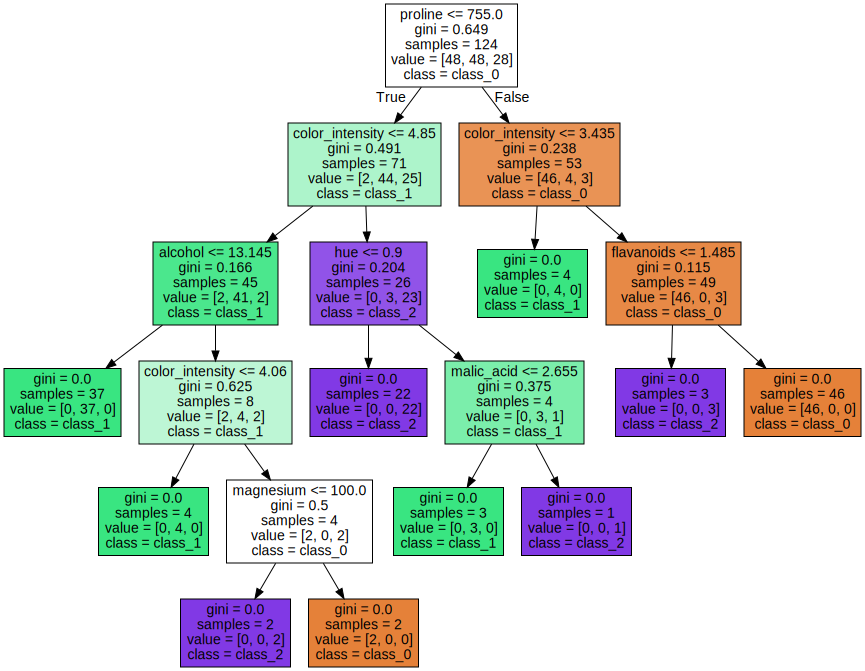

In [8]:
def print_graph(data):
    dot_data = tree.export_graphviz(data, out_file=None,
                                    feature_names=wine_ds.feature_names,
                                    class_names=wine_ds.target_names,
                                    filled=True)
    return graphviz.Source(dot_data)

print_graph(dtc_model)

### 3.
Используя полученную модель, сделайте прогноз для тестовой выборки данных и, пользуясь встроенной функцией score(), определите точность модели.

In [9]:
dtc_predictions = dtc.predict(X_test)

In [10]:
accuracy = dtc.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9444444444444444


Теперь попробуем сделать начальную настройку гиперпараметров и посмотреть, что из этого выйдет.

### 4.

Постройте модель, указав гиперпараметр max_features равным 2 (так же указав random_state=17) и, сделав прогноз на тестовых данных, определите, стала ли модель работать точнее.

*Примечание: гиперпараметр max_features показывает модели, сколько различных признаков необходимо использовать каждый раз при принятии решения о разделении. То есть если, допустим, у вас имеются 50 признаков, а max_features=10, то в каждом узле случайным образом выбираются 10 признаков, которые будут использоваться для поиска лучшего разделения.*

In [11]:
dtc_new = DecisionTreeClassifier(random_state=17, max_features=2) # для значения 2 изменений в точности нет
dtc_model_new = dtc_new.fit(X_train, y_train)

In [12]:
dtc_predictions = dtc_new.predict(X_test)

In [13]:
accuracy = dtc_new.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9444444444444444


### 5.
Теперь постройте граф дерева решений, используя graphviz.

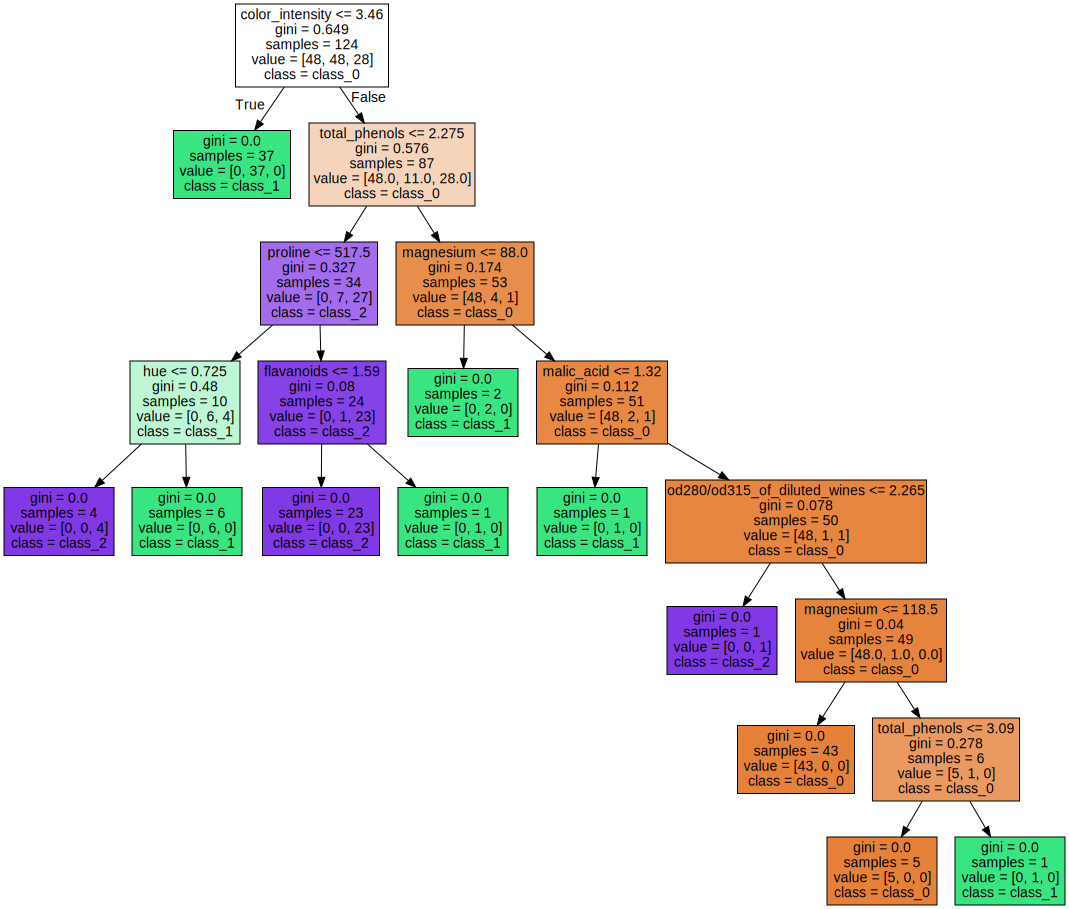

In [14]:
print_graph(dtc_model_new)

Модель работает точнее, чем без настройки гиперпараметров, но по графу можно увидеть, что глубина дерева увеличилась, при этом в нескольких листах присутствует только по одному объекту, из-за чего на тестовом наборе данных дерево могло несколько потерять обобщающую способность.

Так как главная задача модели - способность обобщаться на новые данные, то для подбора оптимальных гиперпараметров надо пожертвовать небольшой порцией данных, чтобы на ней во время обучения проверять качество модели.

Часто для этого используют кросс-валидацию: модель обучается K раз на (K-1) подвыборках исходной выборки, а на одной подвыборке проверяется (каждый раз на разной). Получаются K оценок качества модели, которые обычно усредняются, давая среднюю оценку.

Кросс-валидация применяется для подбора гиперпараметров модели в методе GridSearchCV(): для каждой уникальной совокупности значений параметров проводится кросс-валидация и выбирается лучшее сочетание параметров.

### 6.
Используя обученное в предыдущем задании дерево решений, настройте параметры max_depth и max_features на 5-кратной валидации с помощью GridSearchCV. Для этого в функцию GridSearchCV передайте параметры (tree, tree_params, cv=5).

*Примечание: tree здесь - не обученная модель, а объект, который инкапсулирует алгоритм. Например, в уроке мы его обозначали как dtc.*

In [15]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [16]:
tree_params = {'max_depth': range(1, 6), # я правильно понимаю, что модель обучится 6 раз, и метод выберет лучшие параметры?
               'max_features': range(1, 10)}

tree_grid = GridSearchCV(dtc_new, tree_params, cv=5)

### 7.
С помощью метода tree_grid.fit() постройте модель на тренировочных данных и выведите лучшее сочетание параметров с помощью метода tree_grid.best_params_.

In [18]:
tree_grid.fit(X_train, y_train)

f'Best parameters: {tree_grid.best_params_}'

"Best parameters: {'max_depth': 4, 'max_features': 2}"

### 8.
С помощью полученной модели сделайте прогноз - predict - для тестовой выборки и выведите долю верных ответов, проверив точность модели, используя функцию accuracy_score.

In [19]:
from sklearn.metrics import accuracy_score

In [21]:
predicted = tree_grid.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

f'Accuracy: {accuracy:.4f}' # точность уменьшилась

'Accuracy: 0.9074'